# Аналитика в авиакомпании

1. [Описание проекта](#description)
2. [Описание данных](#description_2)
3. [Знакомство с данными, предварительная обработка и подготовка данных](#step_1)
4. [Исследовательский анализ данных](#step_2)
5. [Общий вывод](#step_3)

## Описание проекта. <a name="description"></a>

Вы аналитик компании «F9» — это российская авиакомпания, выполняющая внутренние пассажирские авиаперевозки. Сотни перелётов каждый день. Важно понять предпочтения пользователей, покупающих билеты на те или иные направления.
Вам предстоит изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие фестивали. 

## Описание данных<a name="description_2"></a>

База данных об авиаперевозках:

Таблица __airports__ — информация об аэропортах:

 - airport_code — трёхбуквенный код аэропорта
 - airport_name — название аэропорта
 - city — город
 - timezone — временная зона

Таблица __aircrafts__ — информация о самолётах:

 - aircraft_code — код модели самолёта
 - model — модель самолёта
 - range — количество самолётов

Таблица __tickets__ — информация о билетах:

 - ticket_no — уникальный номер билета
 - passenger_id — персональный идентификатор пассажира
 - passenger_name — имя и фамилия пассажира

Таблица __flights__ — информация о рейсах:

 - flight_id — уникальный идентификатор рейса
 - departure_airport — аэропорт вылета
 - departure_time — дата и время вылета
 - arrival_airport — аэропорт прилёта
 - arrival_time — дата и время прилёта
 - aircraft_code – id самолёта

Таблица __ticket_flights__ — стыковая таблица «рейсы-билеты»:

 - ticket_no — номер билета
 - flight_id — идентификатор рейса

Таблица __festivals__ — информация о фестивалях:

 - festival_id — уникальный номер фестиваля
 - festival_date — дата проведения фестиваля
 - festival_city — город проведения фестиваля
 - festival_name — название фестиваля
 
Также есть файлы, в которых содержатся результаты запросов из предыдущих заданий.

__/datasets/query_1.csv__  - в нём содержится информация о:

 - model — модели самолета
 - flights_amount — количество рейсов для каждой модели самолетов model в сентябре 2018 года


__/datasets/query_3.csv__ — в нём содержится информация о:

 - city — городах
 - average_flights — среднем количестве рейсов, прибывающих в город city за день в августе 2018 года

## Знакомство с данными, предварительная обработка и подготовка данных <a name="step_1"></a>

In [1]:
#проведем импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

import seaborn as sns

pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment=None


In [2]:
data_query_1 = pd.read_csv('/datasets/query_1.csv')
data_query_3 = pd.read_csv('/datasets/query_3.csv')

In [3]:
#познакомимся с данными data_query_1
data_query_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [4]:
#проверим на дубликаты
data_query_1.duplicated().sum()

0

In [5]:
#датасет небольшой, выведем его полностью.
data_query_1

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


Данные в таблице __data_query_1__ без пропусков и дубликатов,тип данных в столбце __model__ - object(текст), в столбце 
__flights_amount__ - int64(целые числа)

In [6]:
#познакомимся с данными data_query_3
data_query_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [7]:
#проверим на дубликаты
data_query_3.duplicated().sum()

0

In [8]:
#Посмотрим часть датафрейма.
data_query_3.sample(10)

,city,average_flights
57,Ноябрьск,3.000000
21,Иваново,1.000000
37,Липецк,1.294118
9,Братск,1.000000
38,Магадан,1.357143
3,Архангельск,5.354839
20,Екатеринбург,11.322581
45,Надым,2.290323
75,Ставрополь,2.000000
62,Пенза,4.000000


Данные в таблице __data_query_3__ без пропусков и дубликатов,тип данных в столбце __city__ - object(текст), в столбце average_flights - int64(целые числа)



## 3. Исследовательский анализ данных<a name="step_2"></a>

- Определим топ-10 городов по количеству рейсов;
- Построим графики: модели самолетов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;

In [9]:
#построим график количества рейсов по моделям самолетов
data_plot_1=data_query_1.sort_values(by='flights_amount', ascending=False)

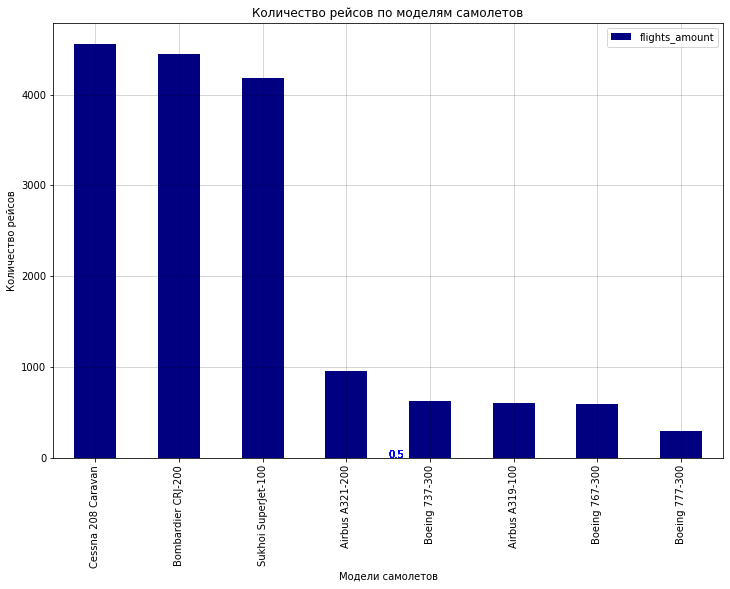

In [10]:
ax = data_plot_1.plot(x = 'model', figsize=(12,8), color="navy", kind="bar")

ax.grid(b=True, color='black', alpha=0.2)

for i in ax.patches:
    ax.text(i.get_width()+3, i.get_y()+0.5, str(round((i.get_width()), 2)),
            fontsize=10, fontweight='light', color='blue')
    
plt.title('Количество рейсов по моделям самолетов')
plt.ylabel('Количество рейсов')
plt.xlabel('Модели самолетов')
plt.show()

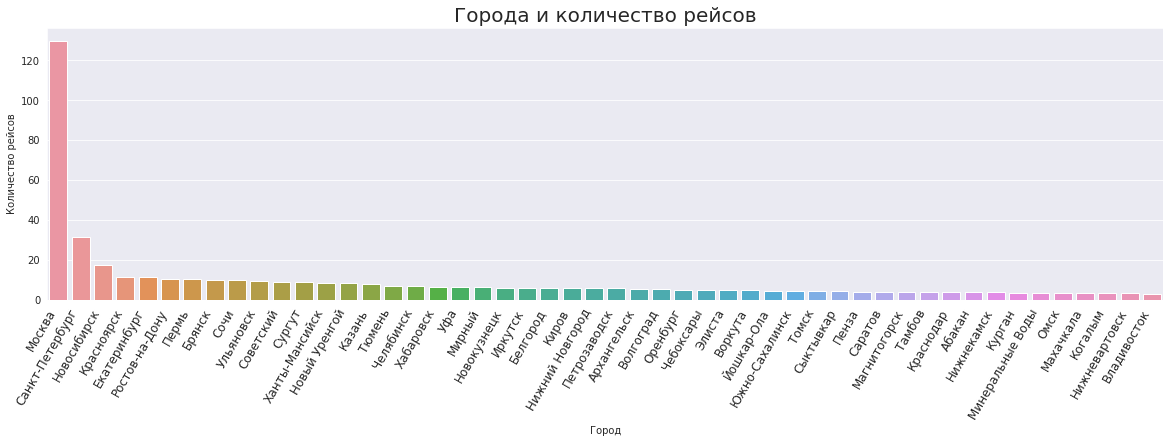

In [11]:
#Выведем график по 50 позициям списка.
flights_by_city = data_query_3.sort_values(by='average_flights', ascending=False).head(50)
sns.set_style('darkgrid')

plt.figure(figsize=(20, 5))
sns.barplot(data = flights_by_city, x='city', y='average_flights')
plt.xticks(rotation=60, horizontalalignment='right', fontsize=12)
plt.title('Города и количество рейсов',fontsize=20)
plt.ylabel('Количество рейсов')
plt.xlabel('Город')
plt.show()


In [12]:
#определим топ 10 городов по количеству рейсов
top_10_cities = data_query_3.sort_values(by='average_flights', ascending=False).head(10)
top_10_cities

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


In [ ]:
#построим график для топ-10 городов по количеству рейсов
sns.set_style('darkgrid')

plt.figure(figsize=(10, 7))
sns.barplot(data = top_10_cities, x='city', y='average_flights')
plt.xticks(rotation=60, horizontalalignment='right', fontsize=12)
plt.title('Города и количество рейсов',fontsize=20)
plt.ylabel('Количество рейсов')
plt.xlabel('Город')
plt.show()



## Общий вывод <a name="step_3"></a>

10 наиболее популярных направлений для перелетов - Москва, Санкт-Петербург, Новосибирск, Красноярск и Екатеринбург, Ростов-на Дону, Пермь, Брянск, Сочи и Ульяновск. Москва лидирует в этом списке с огромным отрывом.

Наибольшее число рейсов совершается на следующих моделях самолетов:

   1.  __Cessna 208 Caravan__ 4 557 рейсов;
   1. __Bombardier CRJ-200__ 4446 рейсов;    
   1. __Sukhoi SuperJet-100__ 4185 рейсов;
    